In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv("abalone.csv")
print("Number of samples: %d" % len(data))
data.head()

Number of samples: 4177


,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
data["M"] = np.nan
data["F"] = np.nan
data["I"] = np.nan

In [4]:
data.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings,M,F,I
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,NaN,NaN,NaN
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,NaN,NaN,NaN
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,NaN,NaN,NaN
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,NaN,NaN,NaN
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,NaN,NaN,NaN


In [5]:
for i in range (len(data["Sex"])):
    data["M"] = data["Sex"] == "M"
    data["F"] = data["Sex"] == "F"
    data["I"] = data["Sex"] == "I"
del data["Sex"]

In [6]:
data[["M", "F", "I"]] *= 1

In [7]:
data.head()

,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings,M,F,I
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,1,0,0
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,1,0,0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,0,1,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,1,0,0
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,0,1


In [8]:
x = data.drop(columns=(["Rings"]))
y = data["Rings"]

In [9]:
# x = data.values.astype(np.float)
# y = data.values.astype(np.float)
x = x.to_numpy(dtype = 'float32')
y = y.to_numpy(dtype = 'float32')

from sklearn.utils import shuffle
x, y = shuffle(x, y, random_state = 0)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [10]:
from sklearn.tree import DecisionTreeRegressor

In [11]:
#одиночное решающее дерево
scores = []
x_scores = []

def arith_mean(arg):
    return float(sum(arg)) / len(arg)

from time import time
tin = time()

from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

In [12]:
for i in range(1, 50):
    dtr = DecisionTreeRegressor(max_depth=i, random_state = 0)
    score = cross_val_score(dtr, x, y, scoring="r2", cv = 5)
    scores.append(arith_mean(score))
    x_scores.append(i)
tout = time()
display(str(round(-tin+tout,3)) + " сек")

'10.892 сек'

<IPython.core.display.Javascript object>


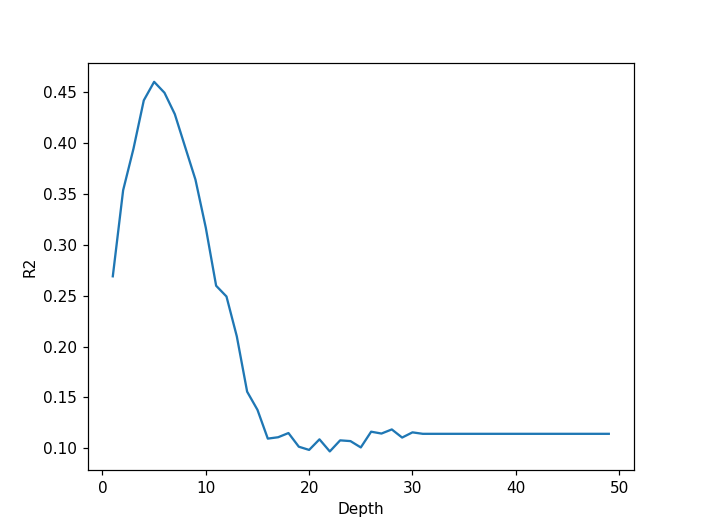

In [13]:
%matplotlib notebook
plt.xlabel("Depth")
plt.ylabel("R2")
display(plt.plot(x_scores,scores))